In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os
import warnings
warnings.filterwarnings("ignore")

# **Read Data**

In [2]:
os.listdir("/kaggle/input/")
df = pd.read_csv("../input/transactions/transactions_fictive_log.csv")

# **Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
#Descriptive stats
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

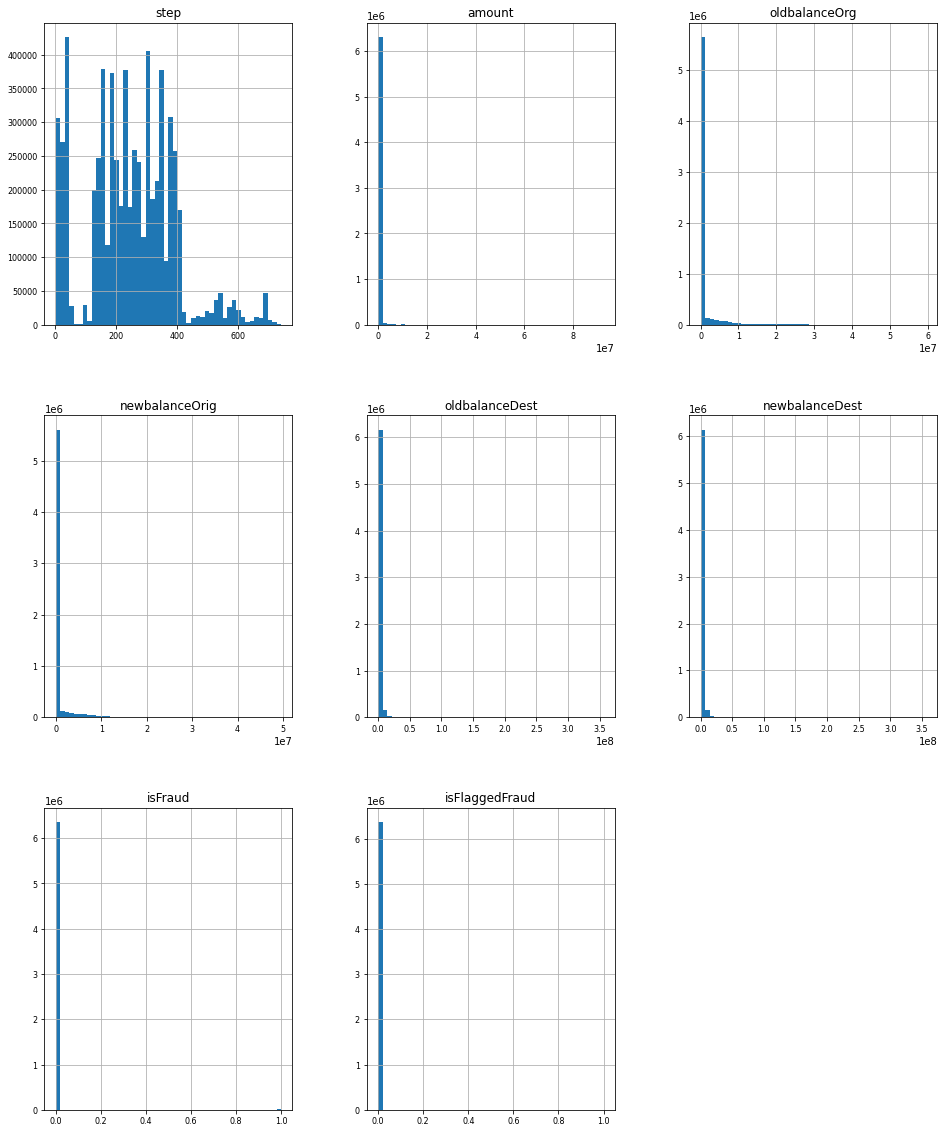

In [6]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [7]:
df_analysis=pd.pivot_table(df,index=["type"], values=['amount','isFraud','isFlaggedFraud'],aggfunc=[np.sum,np.std], margins=True)
print(df_analysis)

                   sum                                  std                 \
                amount isFlaggedFraud isFraud        amount isFlaggedFraud   
type                                                                         
CASH_IN   2.363674e+11              0       0  1.265083e+05       0.000000   
CASH_OUT  3.944130e+11              0    4116  1.753297e+05       0.000000   
DEBIT     2.271992e+08              0       0  1.331854e+04       0.000000   
PAYMENT   2.809337e+10              0       0  1.255645e+04       0.000000   
TRANSFER  4.852920e+11             16    4097  1.879574e+06       0.005479   
All       1.144393e+12             16    8213  6.038582e+05       0.001586   

                    
           isFraud  
type                
CASH_IN   0.000000  
CASH_OUT  0.042851  
DEBIT     0.000000  
PAYMENT   0.000000  
TRANSFER  0.087344  
All       0.035905  


In [8]:
#Check if data is balanced
pie_chart = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=df['isFraud'].value_counts())])
pie_chart.show()

# **Preprocessing & Feature Engineering**

In [9]:
#Taking Subset of data
df2 = df.head(60000)

In [10]:
#Create Functions for feature engineering
#We need to check the changes in sender's and receiver's balance, and flag when inconsistent (will do)
#We need to check if the amount debited from the sender, went into receiver's account, and flag if not correct
#We have to set a threshold in transaction amount and flag if it goes over it.
#We can create feature that says if the receiving account belongs to a merchant

def flag(df):
    df['actual_newbalanceDest'] = df['oldbalanceDest']+df['amount']  
    for i,rows in df.iterrows():
        if df.iloc[i]['actual_newbalanceDest'] == df.iloc[i]['newbalanceDest']:
            df['balanceDest_flag'] = 0
        else:
            df['balanceDest_flag'] = 1

# def true_balance(df):
#     df['diff_sender'] = df['oldbalanceOrg']-df['newbalanceOrig']
#     df['diff_sender'] = df['diff_sender'].astype(int)
#     for i in df['diff_sender']:
#         if df['diff_sender']-df  
    
#     df['diff_receiver'] = df['oldbalanceDest']-df['newbalanceDest']
            
def thresh_flag(df):
    for i in df['amount']:
        if i>200000:
            df['threshold_flag'] = 1
        else:
            df['threshold_flag'] = 0
            
def detect_M(df):
    x = ['M']
    x2 = list(map(df['nameDest'].str.contains, x))
    df['Merchant'] = np.select(x2, '1', '0')
    
#Function for efficient memory use
def reduce_memory(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                       df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [11]:
#Memory reduction in df and feature engineering
reduce_memory(df2)
flag(df2)
thresh_flag(df2)
detect_M(df2)

Mem. usage decreased to  2.69 Mb (46.6% reduction)


In [12]:
# #Fucntion to calculate Information value with WoE - weight of evidence (not ready)

# def information_value(df, feature, target, pr=0):

#     lst = []

#     for i in range(df[feature].nunique()):
#         val = list(df[feature].unique())[i]
#         lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

#     data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
#     data = data[data['Bad'] > 0]

#     data['Share'] = data['All'] / data['All'].sum()
#     data['Bad Rate'] = data['Bad'] / data['All']
#     data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
#     data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
#     data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
#     data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

#     data = data.sort_values(by=['Variable', 'Value'], ascending=True)

#     if pr == 1:
#         print(data)

#     return data['IV'].values[0]

In [13]:
#Encoding the rest of the object type features
#One-hot encoding for type which has 4 differnet values
#Label encoding for nameOrig and nameDest to avoid curse of dimensionality(if we use one hot encoding here, there will be too many dims)
from sklearn import preprocessing

df2 = pd.get_dummies(data = df2, columns=['type'])
lenc = preprocessing.LabelEncoder()
df2['nameOrig'] = lenc.fit_transform(df2['nameOrig'])
df2['nameDest'] = lenc.fit_transform(df2['nameDest'])
df2['Merchant'] = df2['Merchant'].astype(int)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   step                   60000 non-null  int8   
 1   amount                 60000 non-null  float32
 2   nameOrig               60000 non-null  int64  
 3   oldbalanceOrg          60000 non-null  float32
 4   newbalanceOrig         60000 non-null  float32
 5   nameDest               60000 non-null  int64  
 6   oldbalanceDest         60000 non-null  float32
 7   newbalanceDest         60000 non-null  float32
 8   isFraud                60000 non-null  int8   
 9   isFlaggedFraud         60000 non-null  int8   
 10  actual_newbalanceDest  60000 non-null  float32
 11  balanceDest_flag       60000 non-null  int64  
 12  threshold_flag         60000 non-null  int64  
 13  Merchant               60000 non-null  int64  
 14  type_CASH_IN           60000 non-null  uint8  
 15  ty

In [14]:
df2

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,actual_newbalanceDest,balanceDest_flag,threshold_flag,Merchant,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.639648,6987,170136.0,160296.359375,20974,0.00000,0.000,0,0,9839.639648,1,1,1,0,0,0,1,0
1,1,1864.280029,20537,21249.0,19384.720703,21795,0.00000,0.000,0,0,1864.280029,1,1,1,0,0,0,1,0
2,1,181.000000,9256,181.0,0.000000,6342,0.00000,0.000,1,0,181.000000,1,1,0,0,0,0,0,1
3,1,181.000000,54978,181.0,0.000000,5635,21182.00000,0.000,1,0,21363.000000,1,1,0,0,1,0,0,0
4,1,11668.139648,32338,41554.0,29885.859375,11118,0.00000,0.000,0,0,11668.139648,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,16351.089844,13740,10503.0,26854.089844,4030,217578.84375,300883.000,0,0,233929.937500,1,1,0,1,0,0,0,0
59996,9,13690.230469,59239,181.0,0.000000,31216,0.00000,0.000,0,0,13690.230469,1,1,1,0,0,0,1,0
59997,9,163085.375000,41229,208223.0,371308.375000,5677,0.00000,0.000,0,0,163085.375000,1,1,0,1,0,0,0,0
59998,9,455970.281250,52819,72334.0,528304.250000,2411,16430.00000,0.000,0,0,472400.281250,1,1,0,1,0,0,0,0


# **Preparing independent and dependent variables**

In [15]:
#Define dependent and independent variables
df3 = df2.copy()
y = df3['isFraud']
X = df3.drop('isFraud', axis = 1)

In [16]:
print(X.shape)
print(y.shape)

(60000, 18)
(60000,)


In [17]:
#Create X_train and y_train dfs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# **Over-sampling the training data with SMOTE - Synthetic Minority Oversampling Technique**

In [18]:
#Oversampling data with SMOTE because there are very few cases of Fraud
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [19]:
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X, y)

# **Modeling**

In [20]:
#fit the model
import lightgbm 

lgb = lightgbm.LGBMClassifier()
lgb.fit(X_train, y_train)

LGBMClassifier()

In [21]:
y_pred=lgb.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy: 0.9992


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11974     5]
 [    5    16]]

True Positives(TP) =  11974

True Negatives(TN) =  16

False Positives(FP) =  5

False Negatives(FN) =  5


<AxesSubplot:>

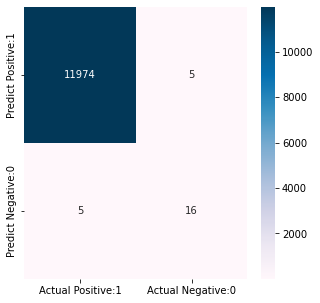

In [24]:
confusion_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap = 'PuBu', ax = ax)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11979
           1       0.76      0.76      0.76        21

    accuracy                           1.00     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       1.00      1.00      1.00     12000



In [26]:
#F1_macro is a better indicator of the model performance, since it is the harmonic mean between precision and sensitivity
#Accuracy is not a good indicator in cases of target feature label imbalance
from sklearn.metrics import f1_score, accuracy_score
print('Accuracy:', round(accuracy_score(y_test, y_pred),3))
print('F1_macro:',round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy: 0.999
F1_macro: 0.88


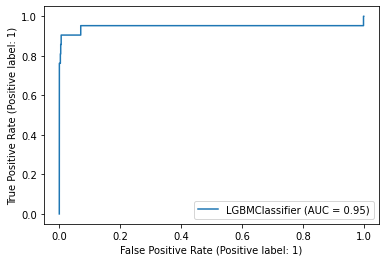

In [27]:
import scikitplot as skplt

metrics.plot_roc_curve(lgb, X_test, y_test)
plt.show()

# **Model Interpretability**

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

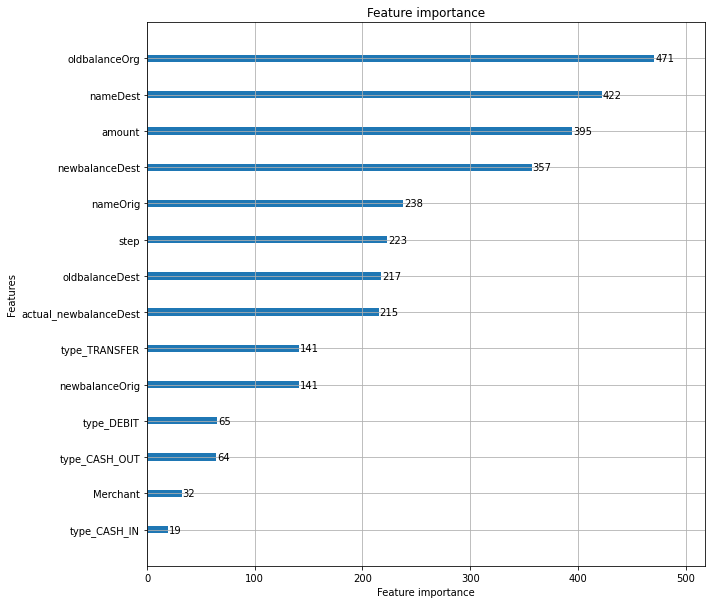

In [28]:
plt.rcParams["figure.figsize"] = (10, 10)

lightgbm.plot_importance(lgb)

In [29]:
#Looking at model weights to explain predictions
import eli5
eli5.show_weights(lgb)

Weight,Feature
0.4387,step
0.1880,nameDest
0.1399,oldbalanceOrg
0.0696,amount
0.0679,newbalanceOrig
0.0256,oldbalanceDest
0.0206,type_CASH_IN
0.0134,type_TRANSFER
0.0099,newbalanceDest
0.0093,actual_newbalanceDest


# **Explainable AI**

In [30]:
import shap
explainer = shap.TreeExplainer(lgb, feature_perturbation="interventional", model_output="raw")
shap_values = explainer.shap_values(X_train)
expected_value = explainer.expected_value

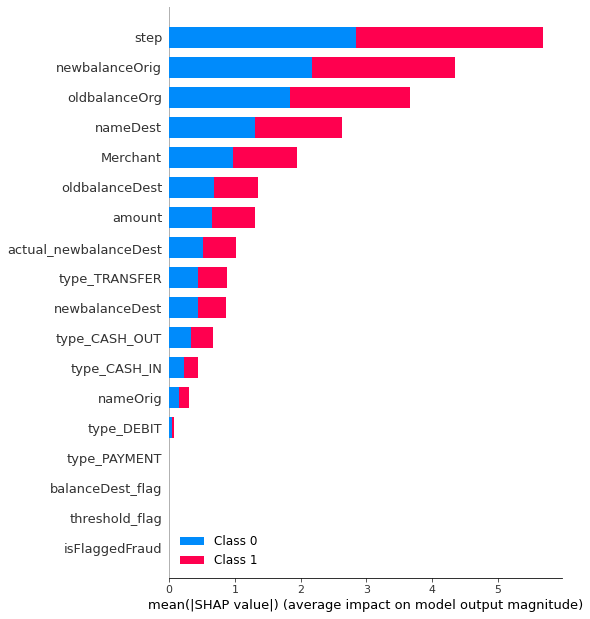

In [31]:
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

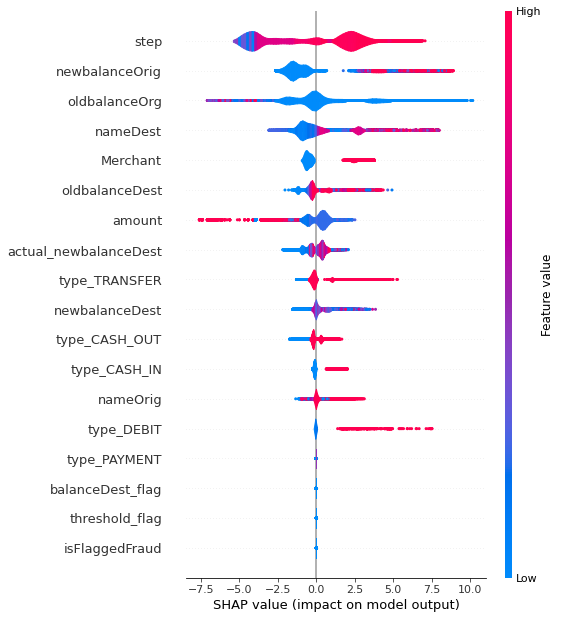

In [32]:
shap.summary_plot(shap_values[0], X_train, plot_type = 'violin') 

In [33]:
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_train)